In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import imp
from elephant.spike_train_surrogates import * 
from elephant.statistics import mean_firing_rate, cv, isi
from elephant.spike_train_correlation import corrcoef
from quantities import Hz, ms
from scipy.linalg import eigh
from IPython.core.display import HTML
import urllib2
HTML(urllib2.urlopen('http://bit.ly/1Bf5Hft').read())

<style>

html {
  font-size: 62.5% !important; }
body {
  font-size: 1.5em !important; /* currently ems cause chrome bug misinterpreting rems on body element */
  line-height: 1.6 !important;
  font-weight: 400 !important;
  font-family: "Raleway", "HelveticaNeue", "Helvetica Neue", Helvetica, Arial, sans-serif !important;
  color: #222 !important; }

div{ border-radius: 0px !important;  }
div.CodeMirror-sizer{ background: rgb(244, 244, 248) !important; }
div.input_area{ background: rgb(244, 244, 248) !important; }

div.out_prompt_overlay:hover{ background: rgb(244, 244, 248) !important; }
div.input_prompt:hover{ background: rgb(244, 244, 248) !important; }

h1, h2, h3, h4, h5, h6 {
  color: #333 !important;
  margin-top: 0 !important;
  margin-bottom: 2rem !important;
  font-weight: 300 !important; }
h1 { font-size: 4.0rem !important; line-height: 1.2 !important;  letter-spacing: -.1rem !important;}
h2 { font-size: 3.6rem !important; line-height: 1.25 !important; letter-spacing: -.1rem !important; }
h3 { font-size: 3.0rem !important; line-height: 1.3 !important;  letter-spacing: -.1rem !important; }
h4 { font-size: 2.4rem !important; line-height: 1.35 !important; letter-spacing: -.08rem !important; }
h5 { font-size: 1.8rem !important; line-height: 1.5 !important;  letter-spacing: -.05rem !important; }
h6 { font-size: 1.5rem !important; line-height: 1.6 !important;  letter-spacing: 0 !important; }

@media (min-width: 550px) {
  h1 { font-size: 5.0rem !important; }
  h2 { font-size: 4.2rem !important; }
  h3 { font-size: 3.6rem !important; }
  h4 { font-size: 3.0rem !important; }
  h5 { font-size: 2.4rem !important; }
  h6 { font-size: 1.5rem !important; }
}

p {
  margin-top: 0 !important; }
  
a {
  color: #1EAEDB !important; }
a:hover {
  color: #0FA0CE !important; }
  
code {
  padding: .2rem .5rem !important;
  margin: 0 .2rem !important;
  font-size: 90% !important;
  white-space: nowrap !important;
  background: #F1F1F1 !important;
  border: 1px solid #E1E1E1 !important;
  border-radius: 4px !important; }
pre > code {
  display: block !important;
  padding: 1rem 1.5rem !important;
  white-space: pre !important; }
  
button{ border-radius: 0px !important; }
.navbar-inner{ background-image: none !important;  }
select, textarea{ border-radius: 0px !important; }

</style>

### Load functions for validation and visualization

In [2]:
%%capture
dist = imp.load_source('*', './validation/dist.py')
matstat = imp.load_source('*', './validation/matrix.py')
testdata = imp.load_source('*', './validation/test_data.py')
vizi = imp.load_source('*', '../INM6/Tasks/viziphant/plots/generic.py')

data_path = '/home/robin/Projects/ValidationTools'
nest_path = data_path + "/sim_data/NEST_data"
spinnaker_path = data_path + "/sim_data/SpiNNaker_data"

# Number of spiketrains:
N = 100

### Load spiketrains from simulation

In [3]:
spiketrain_list_1 = testdata.load_data(nest_path, ['spikes_L4'], N)[0][0]

spiketrain_list_2 = testdata.load_data(spinnaker_path, ['spikes_L4'], N)[0][0]

### Or generate custom spiketrains

In [4]:
spiketrain_list_1 = testdata.test_data(size=N, corr=[.5,.5,.5], 
                                       t_stop=500*ms, rate=100*Hz, 
                                       assembly_sizes=[8,8,8],
                                       method="CPP", bkgr_corr=0.0)

spiketrain_list_2 = testdata.test_data(size=N, corr=[.5,.5,.5], 
                                       t_stop=500*ms, rate=100*Hz, 
                                       assembly_sizes=[8,8,8],
                                       method="CPP", bkgr_corr=0.0)

### Compare distributions 
##### of CVs, firing rates, correlation coefficients, ...

In [5]:
def func(x):
    return cv(isi(x))  # corrcoef(), mean_firing_rate(x)

dist_sample_1 = [func(st) for st in spiketrain_list_1]

dist_sample_2 = [func(st) for st in spiketrain_list_2]

#### Kullback-Leidler Divergence

Write sth


Kullback-Leidler-Divergence
	Interpreting input as data sample...
	2 zero values have been discarded.
	D_KL(P||Q) = 0.09
	D_KL(Q||P) = 0.09



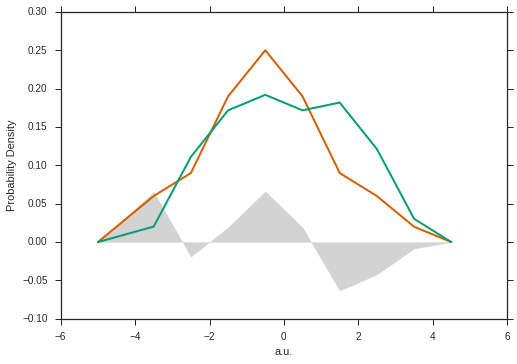

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1)
DKL, DKL_inv = dist.KL_test(dist_sample_1, dist_sample_2, 
                            ax=ax, bins=10, excl_zeros=True)

#### Kolmogorov-Smirnov Distance


Kolmogorov-Smirnov-Distance
	length 1 = 100 	 length 2 = 100
	D_KS = 0.16 	 p value = 0.14



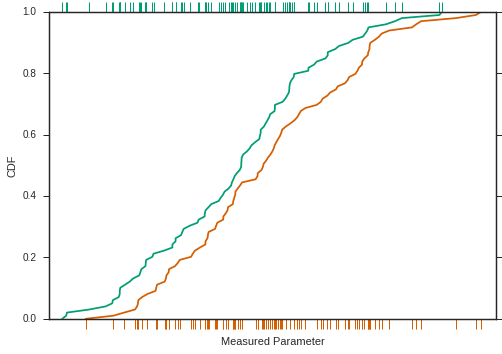

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1)
DKS, p = dist.KS_test(dist_sample_1, dist_sample_2, ax=ax)

#### Mann-Whitney U Test


Mann-Whitney-U-Test
	length 1 = 100 	 length 2 = 100
	U = 4316.00   	 p value = 0.09
1.5345


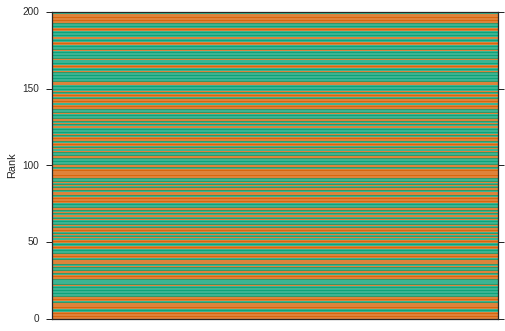

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1)
U, p = dist.MWU_test(dist_sample_1, dist_sample_2, 
                     ax=ax, excl_nan=True)

### Compare the correlation matrices

#### Rasterplots

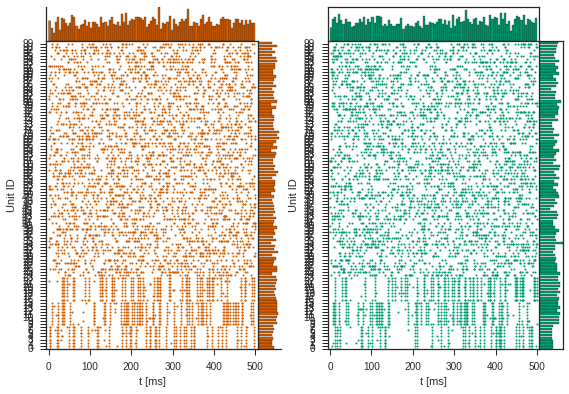

In [20]:
corr_matrix_1 = matstat.corr_matrix(spiketrain_list_1)
corr_matrix_2 = matstat.corr_matrix(spiketrain_list_2)

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.tight_layout()
__ = vizi.rasterplot(ax[0], spiketrain_list_1, palette=(['r']))
__ = vizi.rasterplot(ax[1], spiketrain_list_2, palette=(['g']))

### Heatmap

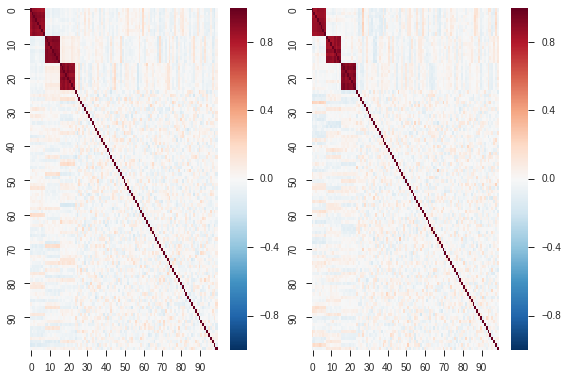

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.tight_layout()
matstat.plot_matrix(corr_matrix_1, ax[0])
matstat.plot_matrix(corr_matrix_2, ax[1])

#### Eigenvalue distribution

TypeError: eigenvalue_distribution() got an unexpected keyword argument 'color'

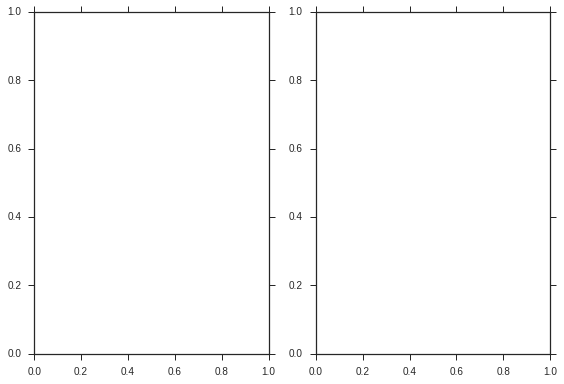

In [26]:
EWs_1, EVs_1 = eigh(corr_matrix_1)
EWs_2, EVs_2 = eigh(corr_matrix_2)

# Generate surrogates as reference
def generate_ref(spiketrain_list):
    surrogate_spiketrain_list = testdata.generate_surrogates(spiketrain_list, 
                                                             dither_spike_train, 
                                                             shift=10*ms)
    surrogate_corr_matrix = matstat.corr_matrix(surrogate_spiketrain_list)
    return eigh(surrogate_corr_matrix)[0]

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.tight_layout()
__ = matstat.eigenvalue_distribution(EWs_1, ax[0], 
                                     surrogate_EWs=generate_ref(spiketrain_list_1),
                                     binnum=int(max(EWs_1))*5, color='r')
__ = matstat.eigenvalue_distribution(EWs_2, ax[1], 
                                     surrogate_EWs=generate_ref(spiketrain_list_2),
                                     binnum=int(max(EWs_2))*5, color='g')

matstat.redundancy(EWs_1)
matstat.redundancy(EWs_2)

#### Eigenvalue spectra


Significance Test:
	 Method: SCREE 
	 6 of 100 eigenvalues are significant

Princial components:
	0: 8.40
	1: 7.32
	2: 7.15
	3: 2.30
	4: 2.19
	5: 2.01


Significance Test:
	 Method: SCREE 
	 6 of 100 eigenvalues are significant

Princial components:
	0: 7.70
	1: 7.64
	2: 7.36
	3: 2.29
	4: 2.14
	5: 2.05



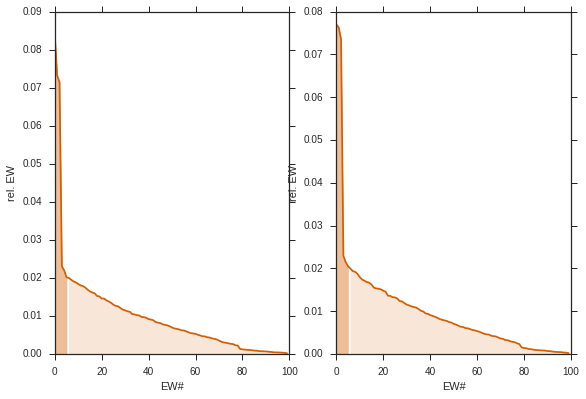

In [43]:
from IPython.display import display, HTML
from IPython.core.display import HTML

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.tight_layout()


HTML("<style> div.code_cell{width: 75%;float: left;}")
pc_nbr_1 = matstat.eigenvalue_spectra(EWs_1, method='SCREE', ax=ax[0])
HTML("<style> div.code_cell{width: 75%;float: right;}")
pc_nbr_2 = matstat.eigenvalue_spectra(EWs_2, method='SCREE', ax=ax[1])

#### Show eigenvectors

In [ ]:
matstat.print_eigenvectors(EVs_1, EWs_1, pc_nbr_1)
matstat.print_eigenvectors(EVs_2, EWs_2, pc_nbr_2)

#### Angles between eigenspaces

In [5]:
nbr_of_pcs = max(pc_nbr_1, pc_nbr_2)
_ = matstat.EV_angles(EVs_1[:, -nbr_of_pcs:], EVs_2[:, -nbr_of_pcs:])

NameError: name 'pc_nbr_1' is not defined